In [63]:
import pandas as pd
import os
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
import numpy as np
import datetime
#import matplotlib.pyplot as plt
import seaborn as sns




In [29]:
POMI_2017_2018 = pd.read_csv('data/POMI 2017_2021/POMI_APR2017_to_MAR2018.csv', sep = ',')
POMI_2018_2018 = pd.read_csv('data/POMI 2017_2021/POMI_APR2018_to_SEP2018.csv', sep = ',')
POMI_2018_2019 = pd.read_csv('data/POMI 2017_2021/POMI_OCT2018_to_MAR2019.csv', sep = ',')
POMI_2019_2020 = pd.read_csv('data/POMI 2017_2021/POMI_APR2019_to_MAR2020.csv', sep = ',')
POMI_2020_2021 = pd.read_csv('data/POMI 2017_2021/POMI_APR2020_to_MAR2021_v2.csv', sep = ',')

POMI_FILES = [POMI_2017_2018, 
POMI_2018_2018,
POMI_2018_2019, 
POMI_2019_2020, 
POMI_2020_2021]


POMI = pd.concat(POMI_FILES)


In [136]:
POMI.dtypes
POMI['report_period_end'] = pd.to_datetime(POMI['report_period_end'])
POMI['ccg_name'] = POMI['ccg_name'].str.upper()

In [137]:
POMI_pivot = pd.pivot_table(POMI, index = ['report_period_end', 'ccg_code', 'ccg_name'], columns = 'field', values = 'value')
POMI_pivot

field                                                                      New_Pat_Enbld  \
report_period_end ccg_code ccg_name                                                        
2017-04-30        00C      NHS DARLINGTON CCG                                  46.454545   
                  00D      NHS DURHAM DALES, EASINGTON AND SEDGEFIELD CCG      29.000000   
                  00J      NHS NORTH DURHAM CCG                                25.064516   
                  00K      NHS HARTLEPOOL AND STOCKTON-ON-TEES CCG             33.166667   
                  00L      NHS NORTHUMBERLAND CCG                              22.348837   
...                                                                                  ...   
2021-03-31        99C      NHS NORTH TYNESIDE CCG                              47.960000   
                  99E      NHS BASILDON AND BRENTWOOD CCG                      44.696970   
                  99F      NHS CASTLE POINT AND ROCHFORD CCG                   39.600000   
                  99G      NHS SOUTHEND CCG                                    51.360000   
                  99M      NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG            79.600000   

field                                                                      Pat_Appts_Enbld  \
report_period_end ccg_code ccg_name                                                          
2017-04-30        00C      NHS DARLINGTON CCG                                  2218.636364   
                  00D      NHS DURHAM DALES, EASINGTON AND SEDGEFIELD CCG      1123.763158   
                  00J      NHS NORTH DURHAM CCG                                1713.548387   
                  00K      NHS HARTLEPOOL AND STOCKTON-ON-TEES CCG             1226.277778   
                  00L      NHS NORTHUMBERLAND CCG                              1517.697674   
...                                                                                    ...   
2021-03-31        99C      NHS NORTH TYNESIDE CCG                              2712.400000   
                  99E      NHS BASILDON AND BRENTWOOD CCG                      2487.242424   
                  99F      NHS CASTLE POINT AND ROCHFORD CCG                   2307.750000   
                  99G      NHS SOUTHEND CCG                                    2505.560000   
                  99M      NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG            3406.650000   

field                                                                      Pat_Appts_Use  \
report_period_end ccg_code ccg_name                                                        
2017-04-30        00C      NHS DARLINGTON CCG                                 312.818182   
                  00D      NHS DURHAM DALES, EASINGTON AND SEDGEFIELD CCG     138.394737   
                  00J      NHS NORTH DURHAM CCG                               205.774194   
                  00K      NHS HARTLEPOOL AND STOCKTON-ON-TEES CCG            112.888889   
                  00L      NHS NORTHUMBERLAND CCG                             158.558140   
...                                                                                  ...   
2021-03-31        99C      NHS NORTH TYNESIDE CCG                              13.680000   
                  99E      NHS BASILDON AND BRENTWOOD CCG                     146.848485   
                  99F      NHS CASTLE POINT AND ROCHFORD CCG                   73.950000   
                  99G      NHS SOUTHEND CCG                                    74.480000   
                  99M      NHS NORTH EAST HAMPSHIRE AND FARNHAM CCG            50.800000   

field                                                                      Pat_DetCodeRec_Enbld  \
report_period_end ccg_code ccg_name                                                               
2017-04-30        00C      NHS DARLINGTON CCG                                          0.000000   
                  00D      NHS DURHAM DALES, EASINGTON AND SEDGEFIELD CCG             

In [139]:
POMI_data = POMI_pivot.drop(['New_Pat_Enbld','Pat_Appts_Use','Pat_DetCodeRec_Enbld', 'Pat_DetCodeRec_Use', 'Pat_Presc_Use','Sys_Appts_Enbld','Sys_DetCodeRec_Enbld','Sys_Presc_Enbld','Total_Use'], axis=1)
POMI_index = POMI_data.reset_index()
POMI_index

field,report_period_end,ccg_code,ccg_name,Pat_Appts_Enbld,Pat_Presc_Enbld,Total_Pat_Enbld,patient_list_size
0,2017-04-30,00C,NHS DARLINGTON CCG,2218.636364,2216.454545,2300.363636,9797.818182
1,2017-04-30,00D,"NHS DURHAM DALES, EASINGTON AND SEDGEFIELD CCG",1123.763158,1122.815789,1126.289474,7652.131579
2,2017-04-30,00J,NHS NORTH DURHAM CCG,1713.548387,1656.838710,1721.387097,8270.387097
3,2017-04-30,00K,NHS HARTLEPOOL AND STOCKTON-ON-TEES CCG,1226.277778,1238.166667,1257.472222,8228.416667
4,2017-04-30,00L,NHS NORTHUMBERLAND CCG,1517.697674,1518.418605,1525.488372,7314.674419
...,...,...,...,...,...,...,...
7891,2021-03-31,99C,NHS NORTH TYNESIDE CCG,2712.400000,3294.560000,3304.080000,8922.880000
7892,2021-03-31,99E,NHS BASILDON AND BRENTWOOD CCG,2487.242424,2605.545455,2612.787879,8341.424242
7893,2021-03-31,99F,NHS CASTLE POINT AND ROCHFORD CCG,2307.750000,2442.850000,2444.200000,8069.250000
7894,2021-03-31,99G,NHS SOUTHEND CCG,2505.560000,2634.320000,2655.960000,7579.800000


In [148]:
POMI_index.dtypes
POMI_index = POMI_index.astype({'ccg_code': 'string', 'ccg_name': 'string'})
POMI_index.dtypes


field
report_period_end    datetime64[ns]
ccg_code                     string
ccg_name                     string
Pat_Appts_Enbld             float64
Pat_Presc_Enbld             float64
Total_Pat_Enbld             float64
patient_list_size           float64
dtype: object

In [53]:
POMI_index['report_period_end'].nunique()


44

## POMI: Pat_Presc_Enbld and Pat_Appts_Enbld since July 2017

In [141]:
patients_enabled = POMI_index[['report_period_end','Pat_Appts_Enbld', 'Pat_Presc_Enbld','patient_list_size']].groupby('report_period_end').sum()
Patients_enabled = patients_enabled.reset_index()
Patients_enabled 

field,report_period_end,Pat_Appts_Enbld,Pat_Presc_Enbld,patient_list_size
0,2017-04-30,327346.177577,321812.027330,1.705866e+06
1,2017-05-31,330040.073060,324512.320945,1.716791e+06
2,2017-06-30,332261.099615,326786.348867,1.723569e+06
3,2017-07-31,336191.904893,330650.971829,1.733706e+06
4,2017-11-30,333619.744279,326246.155212,1.764018e+06
5,2018-01-31,351639.445725,343242.627448,1.775413e+06
6,2018-02-28,425151.240703,419390.446887,1.779329e+06
7,2018-03-31,402647.101729,398253.558897,1.663946e+06
8,2018-04-30,406491.838408,401593.004176,1.665035e+06
9,2018-05-31,413219.106005,407639.460722,1.673621e+06


<AxesSubplot:>

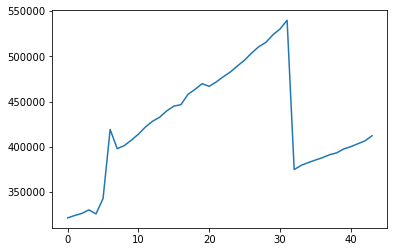

In [142]:
Patients_enabled['Pat_Presc_Enbld'].plot()

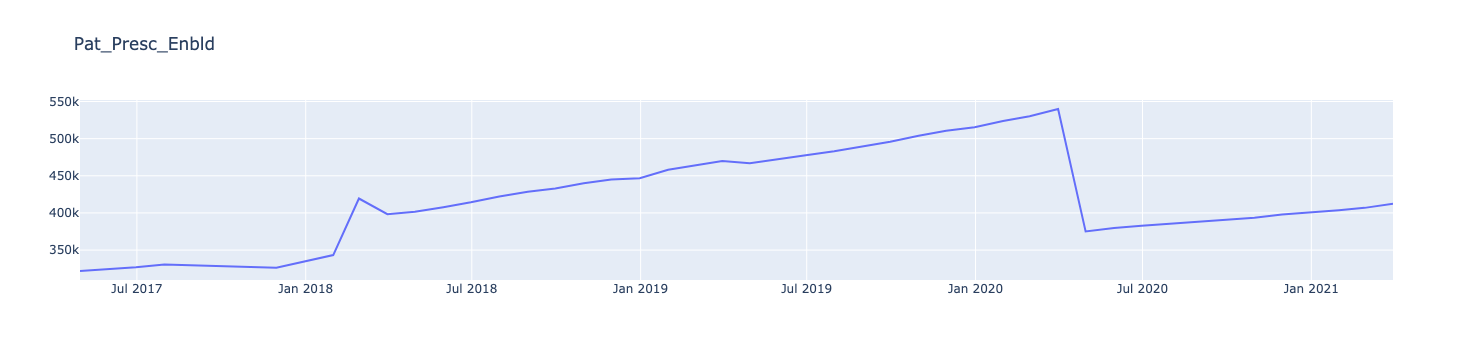

In [143]:
data0 = go.Scatter(
    x = Patients_enabled.report_period_end,
    y = Patients_enabled.Pat_Presc_Enbld,
    name = "Easy")

layout = go.Layout(title = 'Pat_Presc_Enbld')

figure = go.Figure(data = data0, layout = layout)
figure.show()

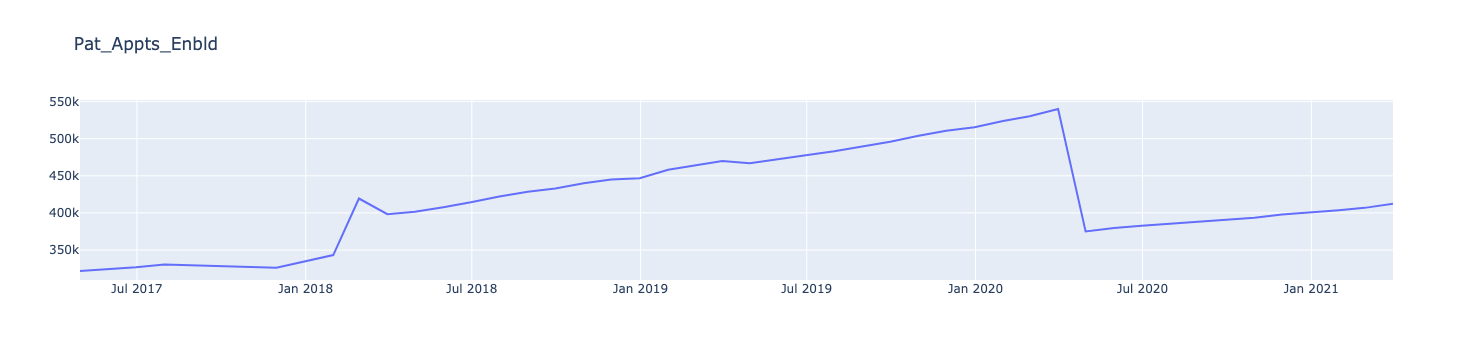

In [144]:
data1 = go.Scatter(
    x = Patients_enabled.report_period_end,
    y = Patients_enabled.Pat_Appts_Enbld,
    name = "Easy")

layout = go.Layout(title = 'Pat_Appts_Enbld')

figure2 = go.Figure(data = data0, layout = layout)
figure2.show()

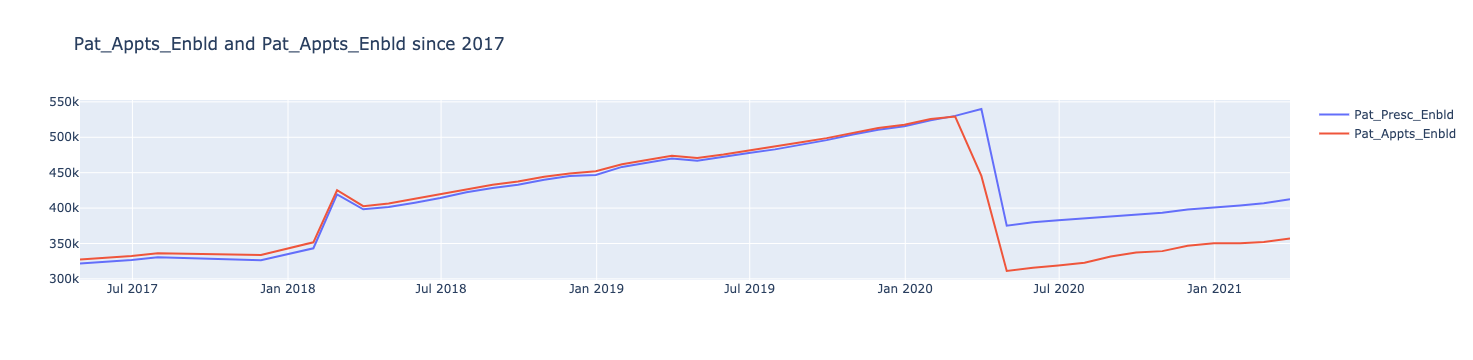

In [145]:
data0 = go.Scatter(
    x = Patients_enabled.report_period_end,
    y = Patients_enabled.Pat_Presc_Enbld,
    name = "Pat_Presc_Enbld")

data1 = go.Scatter(
    x = Patients_enabled.report_period_end,
    y = Patients_enabled.Pat_Appts_Enbld,
    name = "Pat_Appts_Enbld")

data = [data0, data1] 
layout = go.Layout(title = 'Pat_Appts_Enbld and Pat_Appts_Enbld since 2017')

figure2 = go.Figure(data = data, layout = layout)
figure2.show()

## POMI: Pat_Presc_Enbld and Pat_Appts_Enbld since July 2021: Per capita Map

In [155]:
POMI_map_2021 = POMI_index
POMI_map_2021.dtypes


field
report_period_end     object
ccg_code              string
ccg_name              string
Pat_Appts_Enbld      float64
Pat_Presc_Enbld      float64
Total_Pat_Enbld      float64
patient_list_size    float64
dtype: object

In [154]:
POMI_map_2021 = POMI_map_2021['report_period_end'] = POMI_map_2021['report_period_end'].dt.strftime('%Y-%m-%d')
POMI_map_2021.dtypes

AttributeError: Can only use .dt accessor with datetimelike values

In [158]:
POMI_map_2021_march = POMI_map_2021[POMI_map_2021['report_period_end']=='2021-03-31']

POMI_map_2021_march 

field,report_period_end,ccg_code,ccg_name,Pat_Appts_Enbld,Pat_Presc_Enbld,Total_Pat_Enbld,patient_list_size
7761,2021-03-31,00L,NHS NORTHUMBERLAND CCG,3124.789474,3181.605263,3196.289474,8700.631579
7762,2021-03-31,00N,NHS SOUTH TYNESIDE CCG,1873.761905,2430.714286,2455.000000,7538.619048
7763,2021-03-31,00P,NHS SUNDERLAND CCG,2183.394737,2419.684211,2458.184211,7479.210526
7764,2021-03-31,00Q,NHS BLACKBURN WITH DARWEN CCG,1674.391304,2050.608696,2067.913043,7802.043478
7765,2021-03-31,00R,NHS BLACKPOOL CCG,2056.411765,4009.470588,4063.000000,10291.764706
...,...,...,...,...,...,...,...
7891,2021-03-31,99C,NHS NORTH TYNESIDE CCG,2712.400000,3294.560000,3304.080000,8922.880000
7892,2021-03-31,99E,NHS BASILDON AND BRENTWOOD CCG,2487.242424,2605.545455,2612.787879,8341.424242
7893,2021-03-31,99F,NHS CASTLE POINT AND ROCHFORD CCG,2307.750000,2442.850000,2444.200000,8069.250000
7894,2021-03-31,99G,NHS SOUTHEND CCG,2505.560000,2634.320000,2655.960000,7579.800000


## Datawrapper formatting

In [166]:
POMI_map_2021_march_Appts = POMI_map_2021_march .drop(['Pat_Presc_Enbld','Total_Pat_Enbld','patient_list_size', 'report_period_end', 'ccg_code'], axis=1)
POMI_map_2021_march_Appts = POMI_map_2021_march_Appts.rename(columns={'ccg_name': 'Name'})
POMI_map_2021_march_Appts

field,Name,Pat_Appts_Enbld
7761,NHS NORTHUMBERLAND CCG,3124.789474
7762,NHS SOUTH TYNESIDE CCG,1873.761905
7763,NHS SUNDERLAND CCG,2183.394737
7764,NHS BLACKBURN WITH DARWEN CCG,1674.391304
7765,NHS BLACKPOOL CCG,2056.411765
...,...,...
7891,NHS NORTH TYNESIDE CCG,2712.400000
7892,NHS BASILDON AND BRENTWOOD CCG,2487.242424
7893,NHS CASTLE POINT AND ROCHFORD CCG,2307.750000
7894,NHS SOUTHEND CCG,2505.560000


In [167]:
POMI_map_2021_march_Appts.to_csv('POMI_map_2021_march_Appts')